In [2]:
import sys
import numpy as np # linear algebra
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd # data processing
import re

import seaborn as sns #statist graph package|
import matplotlib.pyplot as plt #plot package
from pandasql import sqldf #sql package

In [13]:
charts = pd.read_csv('charts.csv')
chartso = pd.read_csv('chartsoriginal.csv')
spotify = pd.read_csv('spotify.csv')

In [14]:
print(chartso.shape)
chartso.info()
#charts2
chartso

(25512202, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25512202 entries, 0 to 25512201
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.7+ GB


,title,rank,date,artist,url,region,chart,trend,streams
0,Despacito (Featuring Daddy Yankee),1,2017-03-01,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Argentina,top200,SAME_POSITION,365941.0
1,El Amante,2,2017-03-01,Nicky Jam,https://open.spotify.com/track/3umS4y3uQDkqekN...,Argentina,top200,SAME_POSITION,179697.0
2,Reggaetón Lento (Bailemos),3,2017-03-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,SAME_POSITION,169647.0
3,Shape of You,4,2017-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,SAME_POSITION,168495.0
4,Chantaje (feat. Maluma),5,2017-03-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,141696.0
...,...,...,...,...,...,...,...,...,...
25512197,Ký Ức Trốn Đi,46,2021-09-30,NHA,https://open.spotify.com/track/2KslYHjvn4m1uZq...,Vietnam,viral50,MOVE_UP,NaN
25512198,có hẹn với thanh xuân,47,2021-09-30,MONSTAR,https://open.spotify.com/track/54UNNgtE3zzERwT...,Vietnam,viral50,NEW_ENTRY,NaN
25512199,Dive with you (feat. eaJ),48,2021-09-30,Seori,https://open.spotify.com/track/5RqwjQWDwxQ3HTk...,Vietnam,viral50,MOVE_DOWN,NaN
25512200,Never Gonna Give You Up,49,2021-09-30,Rick Astley,https://open.spotify.com/track/4cOdK2wGLETKBW3...,Vietnam,viral50,NEW_ENTRY,NaN


In [17]:
null_columns=chartso.columns[chartso.isnull().any()]
chartso[null_columns].isnull().sum()

title           11
artist          18
streams    5638792
dtype: int64

In [ ]:
chartso.duplicated().sum()

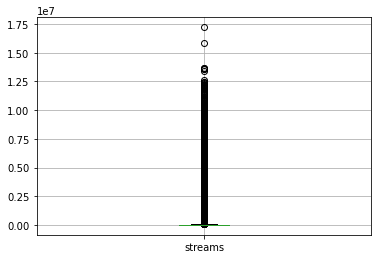

,rank,streams
count,2.500180e+07,1.946498e+07
mean,8.100813e+01,5.473456e+04
std,5.917420e+01,2.081619e+05
min,1.000000e+00,1.001000e+03
25%,2.900000e+01,3.513000e+03
50%,6.700000e+01,9.533000e+03
75%,1.310000e+02,3.501400e+04
max,2.000000e+02,1.722324e+07


In [5]:
charts.boxplot(column=['streams'])
plt.show()
charts.describe()

In [20]:
charts

,title,rank,date,artist,url,region,chart,trend,streams,url2
0,Despacito (Featuring Daddy Yankee),1,2017-02-01,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Argentina,top200,SAME_POSITION,376615.0,https://embed.spotify.com/track/4aWmUDTfIPGksM...
1,Reggaetón Lento (Bailemos),2,2017-02-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,SAME_POSITION,195906.0,https://embed.spotify.com/track/3AEZUABDXNtecA...
2,Chantaje (feat. Maluma),3,2017-02-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,170048.0,https://embed.spotify.com/track/6mICuAdrwEjh6Y...
3,Cuando Se Pone a Bailar,4,2017-02-01,Rombai,https://open.spotify.com/track/1MpKZi1zTXpERKw...,Argentina,top200,SAME_POSITION,154424.0,https://embed.spotify.com/track/1MpKZi1zTXpERK...
4,Otra vez (feat. J Balvin),5,2017-02-01,Zion & Lennox,https://open.spotify.com/track/3QwBODjSEzelZyV...,Argentina,top200,SAME_POSITION,123791.0,https://embed.spotify.com/track/3QwBODjSEzelZy...
...,...,...,...,...,...,...,...,...,...,...
25001796,Minh Cung Yeu Nhau,46,2021-02-28,"thaison!, hnhngan",https://open.spotify.com/track/1Q6cU8IEMc3IE25...,Vietnam,viral50,SAME_POSITION,NaN,https://embed.spotify.com/track/1Q6cU8IEMc3IE2...
25001797,Hẹn Yêu (Lofi Ver.),47,2021-02-28,"Phan Yến Nhi, Freak D",https://open.spotify.com/track/3KWTC9eo7qkaczy...,Vietnam,viral50,MOVE_DOWN,NaN,https://embed.spotify.com/track/3KWTC9eo7qkacz...
25001798,Em Băng Qua (Lập Nguyên) - Remix,48,2021-02-28,Huỳnh Hữu Khang,https://open.spotify.com/track/6O3fSALGjm1gGrx...,Vietnam,viral50,NEW_ENTRY,NaN,https://embed.spotify.com/track/6O3fSALGjm1gGr...
25001799,Weak,49,2021-02-28,Larissa Lambert,https://open.spotify.com/track/07MW63ok3ptSKwa...,Vietnam,viral50,NEW_ENTRY,NaN,https://embed.spotify.com/track/07MW63ok3ptSKw...


In [60]:
sp = spotify.drop_duplicates(subset=['artist'])
sp = sp[sp['genre'].notna()]
sp.genre = sp.genre.str.split(',').str[0:3]
sp.genre

0                                       [australian indie]
1              [dutch hip hop,  dutch pop,  dutch rap pop]
2        [aesthetic rap,  florida rap,  underground hip...
3             [canadian hip hop,  canadian trap,  hip hop]
4                                  [j-rap,  japanese trap]
                               ...                        
62267                                  [chinese viral pop]
62268                               [mainland chinese pop]
62270                [c-pop,  classic mandopop,  mandopop]
62271                                           [hakkapop]
62272             [singaporean mandopop,  singaporean pop]
Name: genre, Length: 38281, dtype: object

In [8]:
type(sp.genre)

pandas.core.series.Series

In [61]:
sp.genre=sp.genre.astype(str)

sp.genre=sp.genre.str.strip("[]")
sp.genre=sp.genre.str.strip("''")
sp.genre=sp.genre.str.replace(" ' ",'')
sp.genre=sp.genre.str.replace("'",'')
#sp.genre=pd.DataFrame(sp.genre)
sp.genre

In [89]:
sp.genre = sp.genre.to_frame()
sp.genre
sp.to_csv("./sp.csv",index=False)

In [95]:
sp= pd.read_csv('sp.csv',index_col=0)

In [278]:
spc=sp.copy()
gent= spc.genre.str.split(',',expand=True).rename(columns=lambda x: f"genre{x+1}")
spc=spc.join(gent)
spc=spc.drop(['genre'],1)
spc=spc.fillna(value=np.nan)
spc

,id,artist,followers,popularity,genre1,genre2,genre3
index,,,,,,,
0,0RCHY4NGqCJ5GLWCYz2OiI,#1 Dads,30826.0,47.0,australian indie,NaN,NaN
1,1uUuCEXmWpKN2YLl5xSoT2,$hirak,73888.0,65.0,dutch hip hop,dutch pop,dutch rap pop
2,5IbEL2xjRtKsunfmsahLuO,$NOT,882047.0,79.0,aesthetic rap,florida rap,underground hip hop
3,7rkW85dBwwrJtlHRDkJDAC,NAV,2727754.0,81.0,canadian hip hop,canadian trap,hip hop
4,19FI3bwyW062xAmEy3rzsk,(sic)boy,36627.0,55.0,j-rap,japanese trap,NaN
...,...,...,...,...,...,...,...
62267,4Wug9w27azIPfgj3rHIEnt,顾三十,516.0,32.0,chinese viral pop,NaN,NaN
62268,6gh34xPY7vB0IL21ylkqpw,马天宇,2001.0,17.0,mainland chinese pop,NaN,NaN
62270,6KCusBln9NTESgcuI0DlUz,黃小琥,30727.0,44.0,c-pop,classic mandopop,mandopop


In [279]:
#spc['main_genre']
spc.loc[spc['genre1'].str.contains('pop','boy band'),'main_genre']='Pop'
spc.loc[spc['genre1'].str.contains('rap','dfw rap'),'main_genre']='Rap'
spc.loc[spc['genre1'].str.contains('k-pop','kpop'),'main_genre']='Kpop'
spc.loc[spc['genre1'].str.contains('hip','drill'),'main_genre']='Hip hop'
spc.loc[spc['genre1'].str.contains('rock'),'main_genre']='Rock'
spc.loc[spc['genre1'].str.contains('punk'),'main_genre']='Punk'
spc.loc[spc['genre1'].str.contains('reggae'),'main_genre']='Reggaeton'
spc.loc[spc['genre1'].str.contains('funk'),'main_genre'] = 'Funk'
spc.loc[spc['genre1'].str.contains('trap'),'main_genre'] = 'Electronic'
spc.loc[spc['genre1'].str.contains('edm'),'main_genre'] = 'Electronic'
spc.loc[spc['genre1'].str.contains('electropop','electro'),'main_genre'] = 'Electronic'
spc.loc[spc['genre1'].str.contains('grime','complextro'),'main_genre'] = 'Electronic'
spc.loc[spc['genre1'].str.contains('tech','house'),'main_genre'] = 'Electronic'
spc.loc[spc['genre1'].str.contains('soul'),'main_genre'] = 'Soul'
spc.loc[spc['genre1'].str.contains('indie'),'main_genre']='Indie'
spc.loc[spc['genre1'].str.contains('latin'),'main_genre']='Latin'
spc.loc[spc['genre1'].str.contains('jazz','bossa'),'main_genre']='Jazz'
spc.loc[spc['genre1'].str.contains('r&b'),'main_genre']=str('R&B')
spc.loc[spc['genre1'].str.contains('folk'),'main_genre']='Folk'
spc.loc[spc['genre1'].str.contains('country'),'main_genre']='Country'
spc.loc[spc['genre1'].str.contains('metal'),'main_genre']='Metal'
spc.loc[spc['genre1'].str.contains('alt z'),'main_genre']='AltZ'
spc.loc[spc['genre1'].str.contains('opm'),'main_genre']='OPM'
spc.loc[spc['genre1'].str.contains('ccm','gospel',),'main_genre']='Religious'
spc.loc[spc['genre1'].str.contains('eurovision'),'main_genre']='Eurovision'
spc.loc[spc['genre1'].str.contains('anime','vocaloid'),'main_genre']='Anime'
spc

,id,artist,followers,popularity,genre1,genre2,genre3,main_genre
index,,,,,,,,
0,0RCHY4NGqCJ5GLWCYz2OiI,#1 Dads,30826.0,47.0,australian indie,NaN,NaN,Indie
1,1uUuCEXmWpKN2YLl5xSoT2,$hirak,73888.0,65.0,dutch hip hop,dutch pop,dutch rap pop,Hip hop
2,5IbEL2xjRtKsunfmsahLuO,$NOT,882047.0,79.0,aesthetic rap,florida rap,underground hip hop,Rap
3,7rkW85dBwwrJtlHRDkJDAC,NAV,2727754.0,81.0,canadian hip hop,canadian trap,hip hop,Hip hop
4,19FI3bwyW062xAmEy3rzsk,(sic)boy,36627.0,55.0,j-rap,japanese trap,NaN,Rap
...,...,...,...,...,...,...,...,...
62267,4Wug9w27azIPfgj3rHIEnt,顾三十,516.0,32.0,chinese viral pop,NaN,NaN,Pop
62268,6gh34xPY7vB0IL21ylkqpw,马天宇,2001.0,17.0,mainland chinese pop,NaN,NaN,Pop
62270,6KCusBln9NTESgcuI0DlUz,黃小琥,30727.0,44.0,c-pop,classic mandopop,mandopop,Pop


In [280]:
spc.loc[spc['genre1'].str.contains('boy band'),'main_genre']='Pop'
spc.loc[spc['genre1'].str.contains('drill'),'main_genre']='Hip hop'
spc.loc[spc['genre1'].str.contains('electr'),'main_genre']='Electronic'
spc.loc[spc['genre1'].str.contains('house'),'main_genre']='Electronic'
spc.loc[spc['genre1'].str.contains('step'),'main_genre']='Electronic'
spc.loc[spc['genre1'].str.contains('chill','lo-fi'),'main_genre']='Chillhop'
spc.loc[spc['genre1'].str.contains('lo-fi'),'main_genre']='Chillhop'
spc.loc[spc['genre1'].str.contains('escape room'),'main_genre']='Escape Room'
spc.loc[spc['genre1'].str.contains('classical'),'main_genre']='Classical'
spc.loc[spc['genre1'].str.contains('bossa'),'main_genre']='Jazz'
spc.loc[spc['genre1'].str.contains('dance pop'),'main_genre']='Pop'
spc.loc[spc['genre1'].str.contains('dance'),'main_genre']='Electronic'
spc.loc[spc['genre1'].str.contains('disco'),'main_genre']='Disco'
spc.loc[spc['genre1'].str.contains('francoton'),'main_genre']='Francoton'
spc.loc[spc['genre1'].str.contains('blues'),'main_genre']='Blues'

In [282]:
spc.to_csv("./spc.csv",index=False,encoding='utf-8')

In [5]:
#charts = pd.read_csv('charts.csv')
#charto=pd.read_csv('chartsoriginal.csv')
charts.streams

0           376615.0
1           195906.0
2           170048.0
3           154424.0
4           123791.0
              ...   
25001796         NaN
25001797         NaN
25001798         NaN
25001799         NaN
25001800         NaN
Name: streams, Length: 25001801, dtype: float64

In [65]:
replace="https://embed"
url_t=[]
for i in charts.url:
    i=i.replace('open','embed')
    url_t.append(i)
charts['url2']=url_t
#charts.url2
charts
charts.to_csv("./charts.csv",index=False)

In [27]:
charts2=charts.dropna(subset=['streams'])
charts2.to_csv("./charts2.csv",index=False)
charts2

In [53]:
print("total genres:", len(set(spc.main_genre)))
set(spc.main_genre)

total genres: 29


{'AltZ',
 'Anime',
 'Blues',
 'Chillhop',
 'Classical',
 'Country',
 'Disco',
 'Electronic',
 'Escape Room',
 'Eurovision',
 'Folk',
 'Francoton',
 'Funk',
 'Hip hop',
 'Indie',
 'Jazz',
 'Kpop',
 'Latin',
 'Metal',
 'OPM',
 'Pop',
 'Punk',
 'R&B',
 'Rap',
 'Reggaeton',
 'Religious',
 'Rock',
 'Soul',
 nan}

In [54]:
spc.head(30)

,artist,followers,popularity,genre1,genre2,genre3,main_genre
id,,,,,,,
0RCHY4NGqCJ5GLWCYz2OiI,#1 Dads,30826.0,47.0,australian indie,NaN,NaN,Indie
1uUuCEXmWpKN2YLl5xSoT2,$hirak,73888.0,65.0,dutch hip hop,dutch pop,dutch rap pop,Hip hop
5IbEL2xjRtKsunfmsahLuO,$NOT,882047.0,79.0,aesthetic rap,florida rap,underground hip hop,Rap
7rkW85dBwwrJtlHRDkJDAC,NAV,2727754.0,81.0,canadian hip hop,canadian trap,hip hop,Hip hop
19FI3bwyW062xAmEy3rzsk,(sic)boy,36627.0,55.0,j-rap,japanese trap,NaN,Rap
0qRgQLC8mPlcJ5Zo6mlcuG,.Sinh,6478.0,46.0,chillhop,focus beats,lo-fi beats,Chillhop
5vDfVxwAH8ANpuIKKxfOeq,Elskavon,4444.0,45.0,ambient worship,compositional ambient,neo-classical,Hip hop
1Fe6FA7A57suR2KAaERpqH,¥ellow Bucks,93333.0,61.0,j-rap,japanese trap,NaN,Rap
0FtsMKmZEq8fBWqdSOWtqp,03 Greedo,295617.0,66.0,cali rap,melodic rap,trap,Rap


In [74]:
spc.genre1.value_counts().head(50)

dance pop               320
k-pop                   263
alternative r&b         237
latin                   230
alt z                   227
alternative metal       202
album rock              191
adult standards         191
funk carioca            178
anime                   174
v-pop                   171
opm                     167
desi pop                160
dutch hip hop           160
contemporary country    151
french hip hop          151
eurovision              149
alternative dance       143
background music        142
italian hip hop         141
finnish dance pop       140
j-pop                   134
c-pop                   129
alternative rock        127
francoton               126
mandopop                123
cantautor               122
art pop                 120
classic swedish pop     120
chinese indie           120
german hip hop          116
indonesian pop          114
edm                     114
afro soul               107
chinese viral pop       105
dutch pop           

In [23]:
spc=pd.read_csv("./spc.csv")
spc[spc['genre1'].isna()]

,id,artist,followers,popularity,genre1,genre2,genre3,main_genre
